# Noisy Paths

This notebook shows empirically how a noisy GPS track over-estimates the lengths of the overall path and how this error decreases with the length of the segments defining the path. 

A **Segment** is defined by two points in the 2D plane.  
A **Path** is an ordered list of Segments.  

In this experiment we compare the length of a straight path made of segments of same lengths to the lengths of the noisy version of the path. 


The experiment consists in:
- generate 10 straight paths of 10 segments, each segment having the same lengths for each path from 1 to 10 (total lengths of the paths are then 10 to 100)   
- for each straight path generate 100 noisy paths where we add a Gaussian noise to each point of the paths (Parameter of the Gaussian noise is the same for all the paths, since it is a modelisation of the GPS error)
- for each of the 100 noisy paths, we compute the mean of the lengths and compute the relative error by comparing to the length of the original path. 
- finally we plot the results


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import helpers

In [3]:
# we define a list of straight paths with increasing lengths
nb_paths = 10
straigh_paths = [helpers.generate_straight_path(nb_paths, 1+i) for i in range(nb_paths)]

In [4]:
# we compute the length of each path
straigh_paths_lenghts = [path.length() for path in straigh_paths]

In [10]:
# for each straight path, we generate 100 noisy paths and compute the mean length
sigma = 0.2
nb_noisy_paths = 100
all_noisy_paths = []
mean_noisy_path_lengths = []
for path in straigh_paths:
    noisy_paths = [helpers.add_gaussian_noise(path, sigma) for _ in range(nb_noisy_paths)]
    all_noisy_paths.append(noisy_paths)
    mean_noisy_path_lengths.append(np.mean([path.length() for path in noisy_paths]))


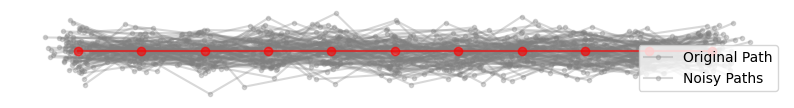

In [14]:
# example of path and noisy paths
path = straigh_paths[0]
noisy_paths = all_noisy_paths[0]

fig, ax = plt.subplots(figsize=(10, 10))


# Plot noisy paths in light grey with transparency
for noisy_path in noisy_paths:
    noisy_path.plot(ax=ax, color='grey', alpha=0.3, marker='.')

# Plot original path in red with transparency
path.plot(ax=ax, color='red', alpha=0.6)

plt.legend(['Original Path', 'Noisy Paths'])
ax.set_aspect('equal')
ax.set_yticklabels([])
ax.axis('off')
plt.show()

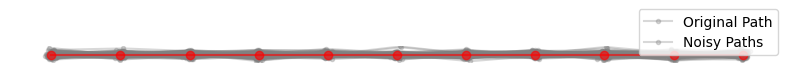

In [15]:
# example of path and noisy paths for longer path
path = straigh_paths[5]
noisy_paths = all_noisy_paths[5]

fig, ax = plt.subplots(figsize=(10, 10))


# Plot noisy paths in light grey with transparency
for noisy_path in noisy_paths:
    noisy_path.plot(ax=ax, color='grey', alpha=0.3, marker='.')

# Plot original path in red with transparency
path.plot(ax=ax, color='red', alpha=0.6)

plt.legend(['Original Path', 'Noisy Paths'])
ax.set_aspect('equal')
ax.set_yticklabels([])
ax.axis('off')
plt.show()

In [17]:
length_errors = [(mean_noisy_path_lengths[i] - straigh_paths_lenghts[i]) / straigh_paths_lenghts[i] for i in range(nb_paths)]


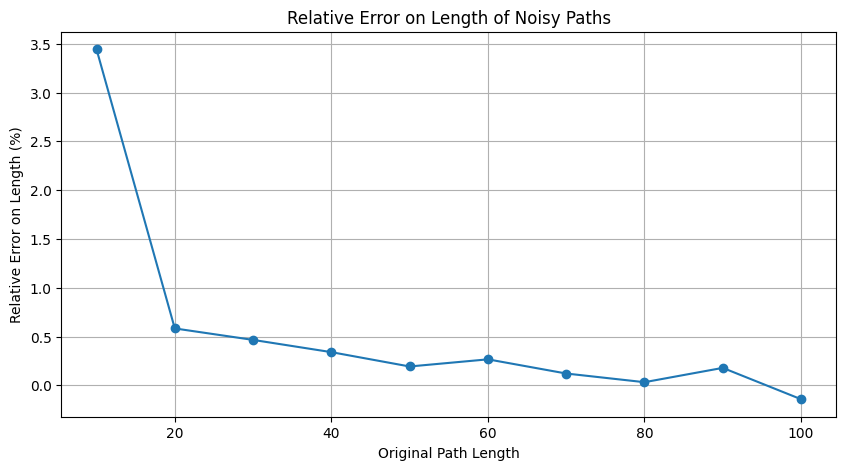

In [21]:
# plot the length errors with respect to the length of the original path
plt.figure(figsize=(10, 5)) 
plt.plot(straigh_paths_lenghts, [error * 100 for error in length_errors], marker='o')
plt.xlabel('Original Path Length')
plt.ylabel('Relative Error on Length (%)')
plt.title('Relative Error on Length of Noisy Paths')
plt.grid()
plt.show()
